In [1]:
import numpy as np
import pandas as pd
import os, datetime
import pickle
import tensorflow as tf
import yfinance as yf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
print('Tensorflow version: {}'.format(tf.__version__))
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from Backtest import Backtest,Position,Bid
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
import keras

Tensorflow version: 2.9.1


In [5]:
def get_data(tickers,length,interval):
    data =  yf.download(tickers = tickers, 
    period = length, interval = interval, group_by = 'ticker',
    auto_adjust = True,
    prepost = False,
    threads = True,
    proxy = None
)

    #data = data.loc[:, pd.IndexSlice[:, ['Close']]]

    #columns = data.columns.droplevel(1)

    #data.columns = columns 

    data.sort_index(axis = 1, inplace = True)
    #data = data.reset_index(drop = True)
    return data.dropna()

In [63]:
with open("sp100tickers.pickle", "rb") as f:
            tickers = pickle.load(f)

In [89]:
data = get_data(tickers,'200d','1d')
data

[*********************100%***********************]  100 of 100 completed


AAPL                                                 \
                 Close        High         Low        Open     Volume   
Date                                                                    
2021-12-22  174.916183  175.135278  171.440560  172.326892   92135300   
2021-12-23  175.553558  176.121217  174.547726  175.125338   68356600   
2021-12-27  179.586868  179.676494  176.340308  176.360215   74919600   
2021-12-28  178.551147  180.582749  177.794285  179.417573   79144300   
2021-12-29  178.640778  179.885626  177.405882  178.590981   62348900   
...                ...         ...         ...         ...        ...   
2022-09-30  138.199997  143.100006  138.000000  141.279999  124705400   
2022-10-03  142.449997  143.070007  137.690002  138.210007  114311700   
2022-10-04  146.100006  146.220001  144.259995  145.029999   87830100   
2022-10-05  146.399994  147.380005  143.009995  144.070007   79471000   
2022-10-07  140.089996  143.100006  139.449997  142.539993   85859100   

                  ABBV                                                ...  \
                 Close        High         Low        Open    Volume  ...   
Date                                                                  ...   
2021-12-22  128.391449  128.906764  126.184337  126.310740   7070900  ...   
2021-12-23  129.402618  130.063786  128.508110  128.663680   5702300  ...   
2021-12-27  130.686081  130.754134  129.470713  129.499881   4436800  ...   
2021-12-28  130.666611  131.512502  130.034625  130.822181   4237200  ...   
2021-12-29  131.609741  132.105606  130.365206  130.880521   5594300  ...   
...                ...         ...         ...         ...       ...  ...   
2022-09-30  134.210007  142.320007  134.089996  142.199997  15348800  ...   
2022-10-03  138.320007  138.800003  135.309998  135.880005   7437500  ...   
2022-10-04  141.990005  142.720001  137.759995  139.210007   6612300  ...   
2022-10-05  143.330002  144.470001  141.110001  141.470001   4777900  ...   
2022-10-07  138.759995  140.050003  137.550003  139.009995   4648100  ...   

                   WMT                                               \
                 Close        High         Low        Open   Volume   
Date                                                                  
2021-12-22  138.155319  138.343086  136.900256  138.254134  5676000   
2021-12-23  137.848969  138.511084  137.216498  138.155319  5864200   
2021-12-27  139.104019  139.212726  137.928032  137.957677  5346900   
2021-12-28  141.100250  141.288017  138.945904  138.945904  5261000   
2021-12-29  141.031097  141.841443  140.645686  140.981683  4348400   
...                ...         ...         ...         ...      ...   
2022-09-30  129.699997  132.360001  129.699997  132.240005  6517900   
2022-10-03  132.529999  132.789993  130.009995  130.240005  5858300   
2022-10-04  134.250000  135.199997  133.369995  133.860001  5378100   
2022-10-05  132.919998  134.619995  132.509995  133.759995  4851300   
2022-10-07  128.559998  131.649994  128.070007  131.309998  5690500   

                   XOM                                                
                 Close        High         Low        Open    Volume  
Date                                                                  
2021-12-22   59.135090   59.503530   58.146111   58.504857  14058300  
2021-12-23   59.164173   59.959234   59.144781   59.309609  13543300  
2021-12-27   60.007717   60.065894   58.582424   59.076915  12593700  
2021-12-28   59.813801   60.414947   59.532623   60.027111  12781000  
2021-12-29   59.290222   59.726533   59.067214   59.610184  12733600  
...                ...         ...         ...         ...       ...  
2022-09-30   87.309998   89.040001   87.309998   88.169998  21344700  
2022-10-03   91.919998   92.360001   89.720001   90.040001  23881300  
2022-10-04   95.269997   95.360001   92.709999   93.239998  22133700  
2022-10-05   99.120003   99.989998   95.660004   95.750000  34857700 

In [90]:
#rolling mean
df = data.rolling(10).mean()
df.dropna(how='any', axis=0, inplace=True) 

In [91]:
model = tf.keras.models.load_model("Transformers")

In [ ]:
seq_len = 150
for i in range(seq_len, len(train_data)):
    X_train.append(train_data[i-seq_len:i])

In [94]:
train_data=df['AAPL'][['High','Close']].values
train_data.shape

(190, 2)

In [101]:
X = train_data[-150:]
X = np.array(X)
X = X.reshape(1,150,2)
model.predict(X)

1/1 [==============================] - 1s 600ms/step


array([[152.94595]], dtype=float32)

In [102]:
def get_predictions(df,tickers,model):
    res = {}
    for ticker in tickers:
        min_price = min(df[ticker][['Close','High']].min(axis=0))
        max_price = max(df[ticker][['Close','High']].max(axis=0))
        
        current_price = df[ticker]['Close'].values[-1]
        
        X = df[ticker][['Close','High']].values[-150:]
        X = (X-min_price)/(max_price - min_price)
        
        X = X.reshape(1,150,2)
        
        p = model.predict(X)
        r = p - current_price/current_price
        
        res[ticker] = ret
    
    res 

In [14]:
def predict(X):
    scaler = MinMaxScaler(feature_range=(0, 1))
    my_array = X.reshape(-1, 1)
    scaled_Close = scaler.fit_transform(my_array)
    scaled_X = scaled_Close.reshape((1, 1, 10))
    y = model.predict(scaled_X)
    b = scaler.inverse_transform(y)
    r = (b[0] - X[-1]) / X[-1]
    return r[0]

In [15]:
def get_target_stocks(df):
    if len(df) < 10:
        return []
    res_dict = {}
    for ticker in df.columns:
        df[ticker+"_X"] = list(df[ticker].rolling(window=10))
        df[ticker+"_X"] = df[ticker+"_X"].apply(lambda x:x.values)
        
        ret = predict(df[ticker+"_X"].iloc[-1])
        if ret > 0:
            res_dict[ticker] = ret
    
    res_dict = {k: v for k, v in sorted(res_dict.items(), key=lambda item: item[1], reverse = True)}
    
    return list(res_dict.keys())[:10]

In [29]:
def lstm(ti,df,positions,cash):
    
    print(ti)
    bid_list = []
    for pos in positions.values():
        #ticker
        ticker = pos.ticker
        #latest price
        price = df.iloc[-1][pos.ticker]
        #shares held in current position
        shares_held = pos.shares

        bid = Bid(ticker = ticker,shares = shares_held,price = price,bid_type = 0)
        bid_list.append(bid)
        
        cash += shares_held*price
        
    df_X = df.iloc[-10:].copy(deep = True)
    
    tickers = get_target_stocks(df_X)
    
    if len(tickers) != 0:
        weight = cash/len(tickers)
    
    for ticker in tickers:
        #latest price
        price = df.iloc[-1][ticker]
        shares = weight//price
        
        bid = Bid(ticker = ticker, shares = shares, price = price,bid_type = 1)
        bid_list.append(bid)
    
    return bid_list
    
 

In [30]:
model = keras.models.load_model("stockprediction.h5")
model_bt = Backtest(data,lstm,has_tc = False)

In [31]:
model_bt.backtest_full()

2019-03-20 00:00:00
2019-03-21 00:00:00
2019-03-22 00:00:00
2019-03-25 00:00:00
2019-03-26 00:00:00
2019-03-27 00:00:00
2019-03-28 00:00:00
2019-03-29 00:00:00
2019-04-01 00:00:00
2019-04-02 00:00:00
1/1 [==============================] - 0s 19ms/step
2019-04-03 00:00:00
1/1 [==============================] - 0s 29ms/step
2019-04-04 00:00:00
1/1 [==============================] - 0s 22ms/step
2019-04-05 00:00:00
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 32ms/step
2019-04-08 00:00:00
1/1 [==============================] - 0s 18ms/step
2019-04-09 00:00:00
1/1 [==============================] - 0s 25ms/step
2019-04-10 00:00:00
1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 17ms/step
2019-04-11 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-04-12 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-04-15 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
2019-04-16 00:00:00
1/1 [==============================] - 0s 15ms/step
2019-04-17 00:00:00
1/1 [==============================] - 0s 19ms/step
2019-04-18 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2019-04-22 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-04-23 00:00:00
1/1 [==============================] - 0s 17ms/step
2019-04-24 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2019-04-25 00:00:00
1/1 [==============================] - 0s 15ms/step
2019-04-26 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-04-29 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
2019-04-30 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-05-01 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-05-02 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
2019-05-03 00:00:00
1/1 [==============================] - 0s 15ms/step
2019-05-06 00:00:00
1/1 [==============================] - 0s 15ms/step
2019-05-07 00:00:00
1/1 [==============================] - 0s 17ms/step
2019-05-08 00:00:00


1/1 [==============================] - 0s 15ms/step
2019-05-09 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-05-10 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-05-13 00:00:00
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 15ms/step
2019-05-14 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-05-15 00:00:00
1/1 [==============================] - 0s 15ms/step
2019-05-16 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step
2019-05-17 00:00:00
1/1 [==============================] - 0s 15ms/step
2019-05-20 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-05-21 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step
2019-05-22 00:00:00
1/1 [==============================] - 0s 18ms/step
2019-05-23 00:00:00
1/1 [==============================] - 0s 18ms/step
2019-05-24 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step
2019-05-28 00:00:00
1/1 [==============================] - 0s 17ms/step
2019-05-29 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-05-30 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step
2019-05-31 00:00:00
1/1 [==============================] - 0s 19ms/step
2019-06-03 00:00:00
1/1 [==============================] - 0s 17ms/step
2019-06-04 00:00:00
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 15ms/step
2019-06-05 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-06-06 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-06-07 00:00:00
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 18ms/step
2019-06-10 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-06-11 00:00:00
1/1 [==============================] - 0s 17ms/step
2019-06-12 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-06-13 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2019-06-14 00:00:00
1/1 [==============================] - 0s 15ms/step
2019-06-17 00:00:00
1/1 [==============================] - 0s 15ms/step
2019-06-18 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2019-06-19 00:00:00
1/1 [==============================] - 0s 17ms/step
2019-06-20 00:00:00
1/1 [==============================] - 0s 71ms/step
2019-06-21 00:00:00
1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 23ms/step
2019-06-24 00:00:00
1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 20ms/step
2019-06-25 00:00:00
1/1 [==============================] - 0s 35ms/step
2019-06-26 00:00:00
1/1 [==============================] - 0s 17ms/step
2019-06-27 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 23ms/step
2019-06-28 00:00:00
1/1 [==============================] - 0s 17ms/step
2019-07-01 00:00:00
1/1 [==============================] - 0s 18ms/step
2019-07-02 00:00:00
1/1 [==============================] - 0s 19ms/step
2019-07-03 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 26ms/step
2019-07-05 00:00:00
1/1 [==============================] - 0s 17ms/step
2019-07-08 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-07-09 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2019-07-10 00:00:00
1/1 [==============================] - 0s 15ms/step
2019-07-11 00:00:00
1/1 [==============================] - 0s 17ms/step
2019-07-12 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step
2019-07-15 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-07-16 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-07-17 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2019-07-18 00:00:00
1/1 [==============================] - 0s 15ms/step
2019-07-19 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-07-22 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step
2019-07-23 00:00:00
1/1 [==============================] - 0s 17ms/step
2019-07-24 00:00:00
1/1 [==============================] - 0s 17ms/step
2019-07-25 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step
2019-07-26 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-07-29 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-07-30 00:00:00
1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 15ms/step
2019-07-31 00:00:00
1/1 [==============================] - 0s 17ms/step
2019-08-01 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-08-02 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-08-05 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step
2019-08-06 00:00:00
1/1 [==============================] - 0s 15ms/step
2019-08-07 00:00:00
1/1 [==============================] - 0s 15ms/step
2019-08-08 00:00:00
1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step
2019-08-09 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-08-12 00:00:00
1/1 [==============================] - 0s 18ms/step
2019-08-13 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
2019-08-14 00:00:00
1/1 [==============================] - 0s 17ms/step
2019-08-15 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-08-16 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2019-08-19 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-08-20 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-08-21 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step
2019-08-22 00:00:00
1/1 [==============================] - 0s 64ms/step
2019-08-23 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-08-26 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2019-08-27 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-08-28 00:00:00
1/1 [==============================] - 0s 18ms/step
2019-08-29 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2019-08-30 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-09-03 00:00:00
1/1 [==============================] - 0s 17ms/step
2019-09-04 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
2019-09-05 00:00:00
1/1 [==============================] - 0s 14ms/step
2019-09-06 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-09-09 00:00:00
1/1 [==============================] - 0s 20ms/step
2019-09-10 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step
2019-09-11 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-09-12 00:00:00
1/1 [==============================] - 0s 17ms/step
2019-09-13 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2019-09-16 00:00:00
1/1 [==============================] - 0s 17ms/step
2019-09-17 00:00:00
1/1 [==============================] - 0s 17ms/step
2019-09-18 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
2019-09-19 00:00:00
1/1 [==============================] - 0s 17ms/step
2019-09-20 00:00:00
1/1 [==============================] - 0s 17ms/step
2019-09-23 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
2019-09-24 00:00:00
1/1 [==============================] - 0s 18ms/step
2019-09-25 00:00:00


1/1 [==============================] - 0s 17ms/step
2019-09-26 00:00:00
1/1 [==============================] - 0s 15ms/step
2019-09-27 00:00:00
1/1 [==============================] - 0s 22ms/step
2019-09-30 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step
2019-10-01 00:00:00
1/1 [==============================] - 0s 15ms/step
2019-10-02 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-10-03 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step
2019-10-04 00:00:00
1/1 [==============================] - 0s 14ms/step
2019-10-07 00:00:00
1/1 [==============================] - 0s 14ms/step
2019-10-08 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step
2019-10-09 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-10-10 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-10-11 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
2019-10-14 00:00:00
1/1 [==============================] - 0s 17ms/step
2019-10-15 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-10-16 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
2019-10-17 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-10-18 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-10-21 00:00:00
1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 16ms/step
2019-10-22 00:00:00
1/1 [==============================] - 0s 17ms/step
2019-10-23 00:00:00
1/1 [==============================] - 0s 15ms/step
2019-10-24 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2019-10-25 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-10-28 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-10-29 00:00:00
1/1 [==============================] - 0s 15ms/step
2019-10-30 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2019-10-31 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-11-01 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-11-04 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2019-11-05 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-11-06 00:00:00
1/1 [==============================] - 0s 15ms/step
2019-11-07 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
2019-11-08 00:00:00
1/1 [==============================] - 0s 19ms/step
2019-11-11 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-11-12 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2019-11-13 00:00:00
1/1 [==============================] - 0s 17ms/step
2019-11-14 00:00:00
1/1 [==============================] - 0s 17ms/step
2019-11-15 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step
2019-11-18 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-11-19 00:00:00
1/1 [==============================] - 0s 17ms/step
2019-11-20 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2019-11-21 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-11-22 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-11-25 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
2019-11-26 00:00:00
1/1 [==============================] - 0s 15ms/step
2019-11-27 00:00:00
1/1 [==============================] - 0s 15ms/step
2019-11-29 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 53ms/step
2019-12-02 00:00:00
1/1 [==============================] - 0s 15ms/step
2019-12-03 00:00:00
1/1 [==============================] - 0s 15ms/step
2019-12-04 00:00:00
1/1 [==============================] - 0s 17ms/step
2019-12-05 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
2019-12-06 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-12-09 00:00:00
1/1 [==============================] - 0s 17ms/step
2019-12-10 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
2019-12-11 00:00:00
1/1 [==============================] - 0s 17ms/step
2019-12-12 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-12-13 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2019-12-16 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-12-17 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-12-18 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2019-12-19 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-12-20 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-12-23 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
2019-12-24 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-12-26 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-12-27 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 18ms/step
2019-12-30 00:00:00
1/1 [==============================] - 0s 16ms/step
2019-12-31 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-01-02 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 19ms/step
2020-01-03 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-01-06 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-01-07 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
2020-01-08 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-01-09 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-01-10 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-01-13 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step
2020-01-14 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-01-15 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-01-16 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
2020-01-17 00:00:00
1/1 [==============================] - 0s 19ms/step
2020-01-21 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-01-22 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2020-01-23 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-01-24 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-01-27 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step
2020-01-28 00:00:00
1/1 [==============================] - 0s 14ms/step
2020-01-29 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-01-30 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
2020-01-31 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-02-03 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-02-04 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
2020-02-05 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-02-06 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-02-07 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2020-02-10 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-02-11 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-02-12 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-02-13 00:00:00


1/1 [==============================] - 0s 17ms/step
2020-02-14 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-02-18 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-02-19 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
2020-02-20 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-02-21 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-02-24 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
2020-02-25 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-02-26 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-02-27 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
2020-02-28 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-03-02 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-03-03 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 18ms/step
2020-03-04 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-03-05 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-03-06 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step
2020-03-09 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-03-10 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-03-11 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step
2020-03-12 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-03-13 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-03-16 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step
2020-03-17 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-03-18 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-03-19 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-03-20 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 23ms/step
2020-03-23 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-03-24 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-03-25 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step
2020-03-26 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-03-27 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-03-30 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step
2020-03-31 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-04-01 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-04-02 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step
2020-04-03 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-04-06 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-04-07 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
2020-04-08 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-04-09 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-04-13 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2020-04-14 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-04-15 00:00:00
1/1 [==============================] - 0s 18ms/step
2020-04-16 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step
2020-04-17 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-04-20 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-04-21 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
2020-04-22 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-04-23 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-04-24 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-04-27 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step
2020-04-28 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-04-29 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-04-30 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 25ms/step
2020-05-01 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-05-04 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-05-05 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 19ms/step
2020-05-06 00:00:00
1/1 [==============================] - 0s 19ms/step
2020-05-07 00:00:00
1/1 [==============================] - 0s 20ms/step
2020-05-08 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
2020-05-11 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-05-12 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-05-13 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2020-05-14 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-05-15 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-05-18 00:00:00
1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step
2020-05-19 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-05-20 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-05-21 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step
2020-05-22 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-05-26 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-05-27 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step
2020-05-28 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-05-29 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-06-01 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-06-02 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step
2020-06-03 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-06-04 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-06-05 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2020-06-08 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-06-09 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-06-10 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
2020-06-11 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-06-12 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-06-15 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
2020-06-16 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-06-17 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-06-18 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step
2020-06-19 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-06-22 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-06-23 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
2020-06-24 00:00:00
1/1 [==============================] - 0s 19ms/step
2020-06-25 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-06-26 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step
2020-06-29 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-06-30 00:00:00
1/1 [==============================] - 0s 32ms/step
2020-07-01 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-07-02 00:00:00


1/1 [==============================] - 0s 16ms/step
2020-07-06 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-07-07 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-07-08 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
2020-07-09 00:00:00
1/1 [==============================] - 0s 18ms/step
2020-07-10 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-07-13 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2020-07-14 00:00:00
1/1 [==============================] - 0s 14ms/step
2020-07-15 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-07-16 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2020-07-17 00:00:00
1/1 [==============================] - 0s 23ms/step
2020-07-20 00:00:00
1/1 [==============================] - 0s 129ms/step
2020-07-21 00:00:00
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 29ms/step
2020-07-22 00:00:00
1/1 [==============================] - 0s 24ms/step
2020-07-23 00:00:00
1/1 [==============================] - 0s 24ms/step
2020-07-24 00:00:00
1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 22ms/step
2020-07-27 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-07-28 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-07-29 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2020-07-30 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-07-31 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-08-03 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2020-08-04 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-08-05 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-08-06 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-08-07 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step
2020-08-10 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-08-11 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-08-12 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2020-08-13 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-08-14 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-08-17 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2020-08-18 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-08-19 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-08-20 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
2020-08-21 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-08-24 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-08-25 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
2020-08-26 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-08-27 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-08-28 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2020-08-31 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-09-01 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-09-02 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step
2020-09-03 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-09-04 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-09-08 00:00:00
1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step
2020-09-09 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-09-10 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-09-11 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-09-14 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2020-09-15 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-09-16 00:00:00
1/1 [==============================] - 0s 139ms/step
2020-09-17 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
2020-09-18 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-09-21 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-09-22 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
2020-09-23 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-09-24 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-09-25 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 18ms/step
2020-09-28 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-09-29 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-09-30 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2020-10-01 00:00:00
1/1 [==============================] - 0s 18ms/step
2020-10-02 00:00:00
1/1 [==============================] - 0s 37ms/step
2020-10-05 00:00:00
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 54ms/step
2020-10-06 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-10-07 00:00:00
1/1 [==============================] - 0s 19ms/step
2020-10-08 00:00:00
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step
2020-10-09 00:00:00
1/1 [==============================] - 0s 18ms/step
2020-10-12 00:00:00
1/1 [==============================] - 0s 19ms/step
2020-10-13 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
2020-10-14 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-10-15 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-10-16 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-10-19 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2020-10-20 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-10-21 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-10-22 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
2020-10-23 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-10-26 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-10-27 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
2020-10-28 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-10-29 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-10-30 00:00:00
1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 15ms/step
2020-11-02 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-11-03 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-11-04 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2020-11-05 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-11-06 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-11-09 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
2020-11-10 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-11-11 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-11-12 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step
2020-11-13 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-11-16 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-11-17 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-11-18 00:00:00


1/1 [==============================] - 0s 16ms/step
2020-11-19 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-11-20 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-11-23 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
2020-11-24 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-11-25 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-11-27 00:00:00
1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 17ms/step
2020-11-30 00:00:00
1/1 [==============================] - 0s 20ms/step
2020-12-01 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-12-02 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step
2020-12-03 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-12-04 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-12-07 00:00:00
1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 48ms/step
2020-12-08 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-12-09 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-12-10 00:00:00
1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 16ms/step
2020-12-11 00:00:00
1/1 [==============================] - 0s 21ms/step
2020-12-14 00:00:00
1/1 [==============================] - 0s 18ms/step
2020-12-15 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
2020-12-16 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-12-17 00:00:00
1/1 [==============================] - 0s 18ms/step
2020-12-18 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step
2020-12-21 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-12-22 00:00:00
1/1 [==============================] - 0s 15ms/step
2020-12-23 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-12-24 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2020-12-28 00:00:00
1/1 [==============================] - 0s 16ms/step
2020-12-29 00:00:00
1/1 [==============================] - 0s 17ms/step
2020-12-30 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
2020-12-31 00:00:00
1/1 [==============================] - 0s 18ms/step
2021-01-04 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-01-05 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step
2021-01-06 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-01-07 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-01-08 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2021-01-11 00:00:00
1/1 [==============================] - 0s 19ms/step
2021-01-12 00:00:00
1/1 [==============================] - 0s 18ms/step
2021-01-13 00:00:00
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step
2021-01-14 00:00:00
1/1 [==============================] - 0s 22ms/step
2021-01-15 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-01-19 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 21ms/step
2021-01-20 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-01-21 00:00:00
1/1 [==============================] - 0s 18ms/step
2021-01-22 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step
2021-01-25 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-01-26 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-01-27 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2021-01-28 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-01-29 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-02-01 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-02-02 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
2021-02-03 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-02-04 00:00:00
1/1 [==============================] - 0s 18ms/step
2021-02-05 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2021-02-08 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-02-09 00:00:00
1/1 [==============================] - 0s 19ms/step
2021-02-10 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
2021-02-11 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-02-12 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-02-16 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step
2021-02-17 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-02-18 00:00:00
1/1 [==============================] - 0s 18ms/step
2021-02-19 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 19ms/step
2021-02-22 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-02-23 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-02-24 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step
2021-02-25 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-02-26 00:00:00
1/1 [==============================] - 0s 18ms/step
2021-03-01 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step
2021-03-02 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-03-03 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-03-04 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step
2021-03-05 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-03-08 00:00:00
1/1 [==============================] - 0s 26ms/step
2021-03-09 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-03-10 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
2021-03-11 00:00:00
1/1 [==============================] - 0s 19ms/step
2021-03-12 00:00:00
1/1 [==============================] - 0s 19ms/step
2021-03-15 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
2021-03-16 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-03-17 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-03-18 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2021-03-19 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-03-22 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-03-23 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
2021-03-24 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-03-25 00:00:00
1/1 [==============================] - 0s 21ms/step
2021-03-26 00:00:00
1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 22ms/step
2021-03-29 00:00:00
1/1 [==============================] - 0s 18ms/step
2021-03-30 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-03-31 00:00:00
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 17ms/step
2021-04-01 00:00:00
1/1 [==============================] - 0s 18ms/step
2021-04-05 00:00:00
1/1 [==============================] - 0s 18ms/step
2021-04-06 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
2021-04-07 00:00:00
1/1 [==============================] - 0s 19ms/step
2021-04-08 00:00:00
1/1 [==============================] - 0s 18ms/step
2021-04-09 00:00:00
1/1 [==============================] - 0s 18ms/step
2021-04-12 00:00:00


1/1 [==============================] - 0s 18ms/step
2021-04-13 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-04-14 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-04-15 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step
2021-04-16 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-04-19 00:00:00
1/1 [==============================] - 0s 18ms/step
2021-04-20 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
2021-04-21 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-04-22 00:00:00
1/1 [==============================] - 0s 18ms/step
2021-04-23 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step
2021-04-26 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-04-27 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-04-28 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
2021-04-29 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-04-30 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-05-03 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2021-05-04 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-05-05 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-05-06 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step
2021-05-07 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-05-10 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-05-11 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step
2021-05-12 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-05-13 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-05-14 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-05-17 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step
2021-05-18 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-05-19 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-05-20 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step
2021-05-21 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-05-24 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-05-25 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2021-05-26 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-05-27 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-05-28 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2021-06-01 00:00:00
1/1 [==============================] - 0s 20ms/step
2021-06-02 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-06-03 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step
2021-06-04 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-06-07 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-06-08 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2021-06-09 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-06-10 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-06-11 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step
2021-06-14 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-06-15 00:00:00
1/1 [==============================] - 0s 14ms/step
2021-06-16 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step
2021-06-17 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-06-18 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-06-21 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-06-22 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step
2021-06-23 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-06-24 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-06-25 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step
2021-06-28 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-06-29 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-06-30 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2021-07-01 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-07-02 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-07-06 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2021-07-07 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-07-08 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-07-09 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
2021-07-12 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-07-13 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-07-14 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step
2021-07-15 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-07-16 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-07-19 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
2021-07-20 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-07-21 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-07-22 00:00:00
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step
2021-07-23 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-07-26 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-07-27 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-07-28 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
2021-07-29 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-07-30 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-08-02 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 19ms/step
2021-08-03 00:00:00
1/1 [==============================] - 0s 26ms/step
2021-08-04 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-08-05 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step
2021-08-06 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-08-09 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-08-10 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step
2021-08-11 00:00:00
1/1 [==============================] - 0s 14ms/step
2021-08-12 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-08-13 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2021-08-16 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-08-17 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-08-18 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
2021-08-19 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-08-20 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-08-23 00:00:00
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step
2021-08-24 00:00:00
1/1 [==============================] - 0s 19ms/step
2021-08-25 00:00:00
1/1 [==============================] - 0s 49ms/step
2021-08-26 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-08-27 00:00:00


1/1 [==============================] - 0s 17ms/step
2021-08-30 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-08-31 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-09-01 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2021-09-02 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-09-03 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-09-07 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
2021-09-08 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-09-09 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-09-10 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
2021-09-13 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-09-14 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-09-15 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
2021-09-16 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-09-17 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-09-20 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
2021-09-21 00:00:00
1/1 [==============================] - 0s 18ms/step
2021-09-22 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-09-23 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step
2021-09-24 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-09-27 00:00:00
1/1 [==============================] - 0s 21ms/step
2021-09-28 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2021-09-29 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-09-30 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-10-01 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-10-04 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step
2021-10-05 00:00:00
1/1 [==============================] - 0s 18ms/step
2021-10-06 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-10-07 00:00:00
1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 16ms/step
2021-10-08 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-10-11 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-10-12 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
2021-10-13 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-10-14 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-10-15 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2021-10-18 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-10-19 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-10-20 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step
2021-10-21 00:00:00
1/1 [==============================] - 0s 75ms/step
2021-10-22 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-10-25 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2021-10-26 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-10-27 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-10-28 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2021-10-29 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-11-01 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-11-02 00:00:00
1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step
2021-11-03 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-11-04 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-11-05 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-11-08 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
2021-11-09 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-11-10 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-11-11 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2021-11-12 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-11-15 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-11-16 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2021-11-17 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-11-18 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-11-19 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
2021-11-22 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-11-23 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-11-24 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2021-11-26 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-11-29 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-11-30 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2021-12-01 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-12-02 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-12-03 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step
2021-12-06 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-12-07 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-12-08 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step
2021-12-09 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-12-10 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-12-13 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-12-14 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step
2021-12-15 00:00:00
1/1 [==============================] - 0s 17ms/step
2021-12-16 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-12-17 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2021-12-20 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-12-21 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-12-22 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
2021-12-23 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-12-27 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-12-28 00:00:00
1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step
2021-12-29 00:00:00
1/1 [==============================] - 0s 15ms/step
2021-12-30 00:00:00
1/1 [==============================] - 0s 16ms/step
2021-12-31 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2022-01-03 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-01-04 00:00:00
1/1 [==============================] - 0s 18ms/step
2022-01-05 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
2022-01-06 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-01-07 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-01-10 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step
2022-01-11 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-01-12 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-01-13 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-01-14 00:00:00


1/1 [==============================] - 0s 15ms/step
2022-01-18 00:00:00
1/1 [==============================] - 0s 15ms/step
2022-01-19 00:00:00
1/1 [==============================] - 0s 15ms/step
2022-01-20 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2022-01-21 00:00:00
1/1 [==============================] - 0s 15ms/step
2022-01-24 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-01-25 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 14ms/step
2022-01-26 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-01-27 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-01-28 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2022-01-31 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-02-01 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-02-02 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step
2022-02-03 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-02-04 00:00:00
1/1 [==============================] - 0s 15ms/step
2022-02-07 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 18ms/step
2022-02-08 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-02-09 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-02-10 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step
2022-02-11 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-02-14 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-02-15 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
2022-02-16 00:00:00
1/1 [==============================] - 0s 15ms/step
2022-02-17 00:00:00
1/1 [==============================] - 0s 15ms/step
2022-02-18 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-02-22 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step
2022-02-23 00:00:00
1/1 [==============================] - 0s 14ms/step
2022-02-24 00:00:00
1/1 [==============================] - 0s 15ms/step
2022-02-25 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
2022-02-28 00:00:00
1/1 [==============================] - 0s 15ms/step
2022-03-01 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-03-02 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
2022-03-03 00:00:00
1/1 [==============================] - 0s 15ms/step
2022-03-04 00:00:00
1/1 [==============================] - 0s 15ms/step
2022-03-07 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
2022-03-08 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-03-09 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-03-10 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step
2022-03-11 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-03-14 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-03-15 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
2022-03-16 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-03-17 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-03-18 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
2022-03-21 00:00:00
1/1 [==============================] - 0s 14ms/step
2022-03-22 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-03-23 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
2022-03-24 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-03-25 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-03-28 00:00:00
1/1 [==============================] - 0s 15ms/step
2022-03-29 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 19ms/step
2022-03-30 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-03-31 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-04-01 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step
2022-04-04 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-04-05 00:00:00
1/1 [==============================] - 0s 21ms/step
2022-04-06 00:00:00
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step
2022-04-07 00:00:00
1/1 [==============================] - 0s 23ms/step
2022-04-08 00:00:00
1/1 [==============================] - 0s 15ms/step
2022-04-11 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step
2022-04-12 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-04-13 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-04-14 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step
2022-04-18 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-04-19 00:00:00
1/1 [==============================] - 0s 15ms/step
2022-04-20 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2022-04-21 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-04-22 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-04-25 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
2022-04-26 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-04-27 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-04-28 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
2022-04-29 00:00:00
1/1 [==============================] - 0s 18ms/step
2022-05-02 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-05-03 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-05-04 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
2022-05-05 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-05-06 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-05-09 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step
2022-05-10 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-05-11 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-05-12 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 24ms/step
2022-05-13 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-05-16 00:00:00
1/1 [==============================] - 0s 15ms/step
2022-05-17 00:00:00
1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 16ms/step
2022-05-18 00:00:00
1/1 [==============================] - 0s 15ms/step
2022-05-19 00:00:00
1/1 [==============================] - 0s 15ms/step
2022-05-20 00:00:00
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step
2022-05-23 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-05-24 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-05-25 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
2022-05-26 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-05-27 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-05-31 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
2022-06-01 00:00:00
1/1 [==============================] - 0s 27ms/step
2022-06-02 00:00:00
1/1 [==============================] - 0s 18ms/step
2022-06-03 00:00:00
1/1 [==============================] - 0s 18ms/step
2022-06-06 00:00:00


1/1 [==============================] - 0s 20ms/step
2022-06-07 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-06-08 00:00:00
1/1 [==============================] - 0s 15ms/step
2022-06-09 00:00:00
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 15ms/step
2022-06-10 00:00:00
1/1 [==============================] - 0s 58ms/step
2022-06-13 00:00:00
1/1 [==============================] - 0s 19ms/step
2022-06-14 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step
2022-06-15 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-06-16 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-06-17 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step
2022-06-21 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-06-22 00:00:00
1/1 [==============================] - 0s 18ms/step
2022-06-23 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step
2022-06-24 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-06-27 00:00:00
1/1 [==============================] - 0s 18ms/step
2022-06-28 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
2022-06-29 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-06-30 00:00:00
1/1 [==============================] - 0s 20ms/step
2022-07-01 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step
2022-07-05 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-07-06 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-07-07 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 20ms/step
2022-07-08 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-07-11 00:00:00
1/1 [==============================] - 0s 20ms/step
2022-07-12 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-07-13 00:00:00
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 17ms/step
2022-07-14 00:00:00
1/1 [==============================] - 0s 22ms/step
2022-07-15 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-07-18 00:00:00
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step
2022-07-19 00:00:00
1/1 [==============================] - 0s 19ms/step
2022-07-20 00:00:00
1/1 [==============================] - 0s 18ms/step
2022-07-21 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step
2022-07-22 00:00:00
1/1 [==============================] - 0s 18ms/step
2022-07-25 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-07-26 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 23ms/step
2022-07-27 00:00:00
1/1 [==============================] - 0s 18ms/step
2022-07-28 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-07-29 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step
2022-08-01 00:00:00
1/1 [==============================] - 0s 21ms/step
2022-08-02 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-08-03 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step
2022-08-04 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-08-05 00:00:00
1/1 [==============================] - 0s 15ms/step
2022-08-08 00:00:00
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 16ms/step
2022-08-09 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-08-10 00:00:00
1/1 [==============================] - 0s 20ms/step
2022-08-11 00:00:00
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 20ms/step
2022-08-12 00:00:00
1/1 [==============================] - 0s 20ms/step
2022-08-15 00:00:00
1/1 [==============================] - 0s 18ms/step
2022-08-16 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-08-17 00:00:00
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 22ms/step
2022-08-18 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-08-19 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-08-22 00:00:00
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step
2022-08-23 00:00:00
1/1 [==============================] - 0s 18ms/step
2022-08-24 00:00:00
1/1 [==============================] - 0s 18ms/step
2022-08-25 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 22ms/step
2022-08-26 00:00:00
1/1 [==============================] - 0s 18ms/step
2022-08-29 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-08-30 00:00:00
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step
2022-08-31 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-09-01 00:00:00
1/1 [==============================] - 0s 18ms/step
2022-09-02 00:00:00
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 18ms/step
2022-09-06 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-09-07 00:00:00
1/1 [==============================] - 0s 16ms/step
2022-09-08 00:00:00
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 16ms/step
2022-09-09 00:00:00
1/1 [==============================] - 0s 19ms/step
2022-09-12 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-09-13 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
2022-09-14 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-09-15 00:00:00
1/1 [==============================] - 0s 19ms/step
2022-09-16 00:00:00
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step
2022-09-19 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-09-20 00:00:00
1/1 [==============================] - 0s 18ms/step
2022-09-21 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-09-22 00:00:00
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step
2022-09-23 00:00:00
1/1 [==============================] - 0s 18ms/step
2022-09-26 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-09-27 00:00:00
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
2022-09-28 00:00:00
1/1 [==============================] - 0s 17ms/step
2022-09-30 00:00:00
1/1 [==============================] - 0s 17ms/step


<AxesSubplot:>

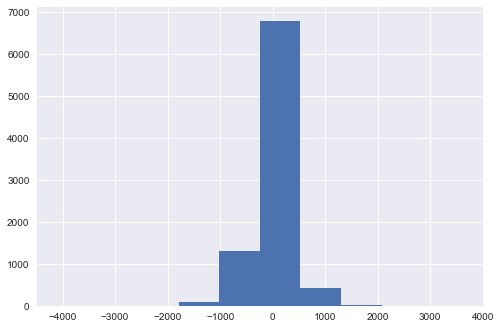

In [32]:
model_bt.transaction_history[model_bt.transaction_history['type'] == 0].pnl.hist()

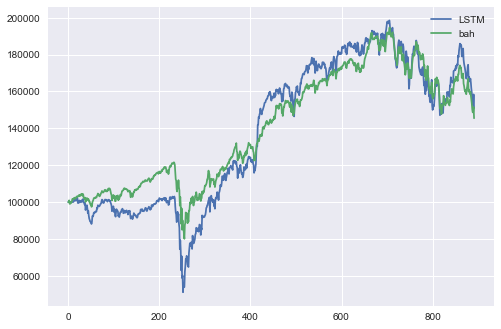

In [33]:
plt.plot(model_bt.portfolio_tracker['total_value'], label = 'LSTM')
plt.plot(model_bt.portfolio_tracker['bah'],label = 'bah')
plt.legend()

In [25]:
model_bt.upload_to_dashboard("LSTM")

Data uploaded.


In [26]:
model_bt.transaction_history.to_csv("lstm_transactions.csv")
model_bt.portfolio_tracker.to_csv("lstm_portfolio_tracker.csv")

In [44]:
model_bt.portfolio_tracker['max'] = model_bt.transaction_history.dt[ model_bt.transaction_history.dt <  model_bt.transaction_history.dt.shift()]